<a href="https://colab.research.google.com/github/R2R-king/CHm/blob/main/PracticePleaseDon'tdelete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp
from tabulate import tabulate

def bessel_deriv(x):
  derivative = 1/2 * (float(sp.besselj(0, x)) - float(sp.besselj(2,x)))
  return derivative

def natural_cubic_spline(x, y, x_point):
    n = len(x)
    h = np.diff(x)
    delta = np.diff(y) / h

    # Решение системы линейных уравнений для вектора z
    A = np.zeros((n, n))
    b = np.zeros(n)
    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * (delta[i] - delta[i-1])

    # Граничные условия: z0 = zn-1 = 0
    A[0, 0] = 1
    A[n-1, n-1] = 1

    z = np.linalg.solve(A, b)

    # Вычисление коэффициентов сплайна
    a = y[:-1]
    b = delta - (h / 3) * (2 * z[:-1] + z[1:])
    c = z[:-1] / 3
    d = (z[1:] - z[:-1]) / (3 * h)

    # Нахождение интервала, в котором находится x_point
    interval = np.where((x[:-1] <= x_point) & (x[1:] >= x_point))[0][0]

    # Вычисление значения сплайна в точке x_point
    x_i = x[interval]
    spline = a[interval] + b[interval] * (x_point - x_i) + c[interval] * (x_point - x_i)**2 + d[interval] * (x_point - x_i)**3

    # Вычисление значения производной
    derivative = b[interval] + 2 * c[interval] * (x_point - x[interval]) + 3 * d[interval] * (x_point - x[interval]) ** 2

    return spline, derivative

# Пример использования
start = 0
end = 3
n = 4

x = np.arange(start, end + 0.25, 0.25)
y = [float(sp.besselj(1, val)) for val in x]
while n < 65:
  errors = []
  derivative_errors = []
  step = (end - start)/n
  x_spline = np.arange(start, end + step, step)
  print(f"Значение сплайна при шаге {n}\n")
  table_data = []
  headers = ["x", "Значение сплайна", "Значение производной", "Погрешность", "Погрешность производной"]
  for x_point in x_spline:
      actual_deriv_value = float(bessel_deriv(x_point))
      spline_value, derivative_value = natural_cubic_spline(x, y, x_point)
      error = abs(spline_value - sp.besselj(1, x_point))
      derivative_error = abs(derivative_value - actual_deriv_value)
      errors.append(error)
      derivative_errors.append(derivative_error)
      table_data.append([f"{x_point:.2f}", f"{spline_value:.6f}", f"{derivative_value:.6f}", f"{error:.6f}", f"{derivative_error:.6f}"])
  table = tabulate(table_data, headers, tablefmt="fancy_grid")
  print(table)
  print(f"Максимальная погрешность сплайна = {max(errors):.6f}\nМаксимальная погрешность производной = {max(derivative_errors):.6f}")
  errors.clear()
  derivative_errors.clear()
  n *= 2
  print("__________________________________________________________________________________")

Значение сплайна при шаге 4

╒══════╤════════════════════╤════════════════════════╤═══════════════╤═══════════════════════════╕
│    x │   Значение сплайна │   Значение производной │   Погрешность │   Погрешность производной │
╞══════╪════════════════════╪════════════════════════╪═══════════════╪═══════════════════════════╡
│ 0    │           0        │               0.499993 │      0        │                  7e-06    │
├──────┼────────────────────┼────────────────────────┼───────────────┼───────────────────────────┤
│ 0.75 │           0.353032 │               0.428886 │      0.003788 │                  0.030302 │
├──────┼────────────────────┼────────────────────────┼───────────────┼───────────────────────────┤
│ 1.5  │           0.565757 │               0.202436 │      0.00782  │                  0.062566 │
├──────┼────────────────────┼────────────────────────┼───────────────┼───────────────────────────┤
│ 2.25 │           0.556734 │              -0.094373 │      0.008356 │          

In [ ]:
#задание 3
import numpy as np
from sympy.logic import true
from sympy import factorial, besselj
from tabulate import tabulate
from scipy.special import roots_legendre


# Определение функции, которую нужно проинтегрировать
def f(x, t):
    return np.cos(x * np.sin(t) - t)


def right_rectangle_integration(a, b, n, x):
    h = (b - a) / n  # Ширина каждого подотрезка
    result = 0.0

    # Вычисление интеграла через суммирование правых концов подотрезков
    for i in range(n):
        t = a + i * h  # Вычисление правого конца подотрезка
        result += f(x, t) * h
    return result


def trapezoidal_integration(a, b, n, x):
    h = (b - a) / n  # Ширина каждого подотрезка
    result = 0.0

    # Вычисление интеграла через суммирование трапеций
    for i in range(n):
        t1 = a + i * h  # Левая граница трапеции
        t2 = a + (i + 1) * h  # Правая граница трапеции
        result += (f(x, t1) + f(x, t2)) * h / 2

    return result


def simpson_integration(a, b, n, x):
    h = (b - a) / n  # Ширина каждого подотрезка
    result = 0.0

    # Вычисление интеграла через суммирование по формуле Симпсона
    for i in range(n):
        t1 = a + i * h  # Левая граница подотрезка
        t2 = a + (i + 1) * h  # Правая граница подотрезка
        t_mid = (t1 + t2) / 2  # Средняя точка подотрезка
        result += (f(x, t1) + 4 * f(x, t_mid) + f(x, t2)) * h / 6

    return result


def gauss_integration(a, b, n, x):
    result = 0.0

    # Calculate the step size
    h = (b - a) / n
    s_i = 0.0
    z = []
    # Calculate the nodes and weights for the composite Gaussian quadrature formula
    for i in range(n+1):
      z.append(a + i*h)
    for i in range(1, n + 1):
      arg_1 = (z[i-1] + (h/2.0)*(1-(1.0/np.sqrt(3))))
      arg_2 = (z[i-1] + h/2.0*(1+(1.0/np.sqrt(3))))
      phi_1 = f(x,arg_1)
      phi_2 = f(x,arg_2)
      s_i = (h/2.0)*(phi_1 + phi_2)
      result += s_i
    return result


# Интегрирование функции с использованием составной формулы правых прямоугольников, формулы трапеции, формулыСимпсона и составной квадратурной формулы Гаусса с двумя узлами:

start = 0.0
end = 3
step = 0.25
x_values = np.arange(start, end + step, step)
a = 0.0
b = np.pi
n = 0
difference = 1
choice = input("Выберите погрешность:\n1) 1.00E-6\n2) 1.00E-8\n")

if choice == "1":
    eps = 0.000001
elif choice == "2":
    eps = 0.00000001
else:
    print("Некорректный ввод")

if choice == "1" or choice == "2":
    table_rr = []  # Таблица для правых прямоугольников
    table_tr = []  # Таблица для формулы трапеции
    table_simpson = []  # Таблица для формулы Симпсона
    table_gauss = []  # Таблица для квадратурной формулы Гаусса

    for x in x_values:
        true_value = float(besselj(1, x))
        if (choice == "1") :
            # Правые прямоугольники
            n_rr = 1  # Начальное число подотрезков
            difference_rr = np.inf  # Инициализация разницы

            while difference_rr > eps:
                n_rr *= 2  # Удвоение числа подотрезков
                result_rr = (1 / np.pi) * right_rectangle_integration(a, b, n_rr, x)
                difference_rr = np.abs(result_rr - true_value)

        # Трапеции
        n_tr = 1  # Начальное число подотрезков
        difference_tr = np.inf

        while difference_tr > eps:
            n_tr *= 2  # Удвоение числа подотрезков
            result_tr = (1 / np.pi) * trapezoidal_integration(a, b, n_tr, x)
            difference_tr = np.abs(result_tr - true_value)

        # Симпсон
        n_simpson = 1  # Начальное число подотрезков
        difference_simpson = np.inf

        while difference_simpson > eps:
            n_simpson *= 2  # Удвоение числа подотрезков
            result_simpson = (1 / np.pi) * simpson_integration(a, b, n_simpson, x)
            difference_simpson = np.abs(result_simpson - true_value)

        # Квадратурная формула Гаусса
        n_gauss = 2  # Количество узлов
        difference_gauss = np.inf

        while difference_gauss >eps :
            n_gauss *= 2  # Удвоение числа подотрезков
            result_gauss = (1 / np.pi) * gauss_integration(a, b, n_gauss, x)
            difference_gauss = np.abs(result_gauss - true_value)
        if(choice == "1") :
            row_rr = [x, true_value, result_rr, difference_rr, n_rr]
            table_rr.append(row_rr)

        row_tr = [x, true_value, result_tr, difference_tr, n_tr]
        table_tr.append(row_tr)

        row_simpson = [x, true_value, result_simpson, difference_simpson, n_simpsonn_simpson ] = [x, true_value, result_simpson, difference_simpson, n_simpson]
        table_simpson.append(row_simpson)

        row_gauss = [x, true_value, result_gauss, difference_gauss, n_gauss]
        table_gauss.append(row_gauss)
    if (choice == "1"):
        headers_rr = ["x", "Истинное значение", "Результат интегрирования (правые прямоугольники)","Разница (правые прямоугольники)", "Количество итераций (правые прямоугольники)"]
    headers_tr = ["x", "Истинное значение", "Результат интегрирования (трапеции)",
                  "Разница (трапеции)", "Количество итераций (трапеции)"]
    headers_simpson = ["x", "Истинное значение", "Результат интегрирования (Симпсон)",
                       "Разница (Симпсон)", "Количество итераций (Симпсон)"]
    headers_gauss = ["x", "Истинное значение", "Результат интегрирования (Гаусс)",
                     "Разница (Гаусс)", "Количество узлов (Гаусс)"]
    if (choice == "1"):
        table_str_rr = tabulate(table_rr, headers_rr, floatfmt=".15f")
    table_str_tr = tabulate(table_tr, headers_tr, floatfmt=".15f")
    table_str_simpson = tabulate(table_simpson, headers_simpson, floatfmt=".15f")
    table_str_gauss = tabulate(table_gauss, headers_gauss, floatfmt=".15f")
    if (choice == "1"):
        print("Таблица для правых прямоугольников:")
        print(table_str_rr)
    print()
    print("Таблица для формулы трапеции:")
    print(table_str_tr)
    print()
    print("Таблица для формулы Симпсона:")
    print(table_str_simpson)
    print()
    print("Таблица для квадратурной формулы Гаусса:")
    print(table_str_gauss)


Выберите погрешность:
1) 1.00E-6
2) 1.00E-8
2

Таблица для формулы трапеции:
                x    Истинное значение    Результат интегрирования (трапеции)    Разница (трапеции)    Количество итераций (трапеции)
-----------------  -------------------  -------------------------------------  --------------------  --------------------------------
0.000000000000000    0.000000000000000                      0.000000000000000     0.000000000000000                                 2
0.250000000000000    0.124025977322727                      0.124025977228322     0.000000000094405                                 4
0.500000000000000    0.242268457674874                      0.242268457674874     0.000000000000000                                 8
0.750000000000000    0.349243602174862                      0.349243602174862     0.000000000000000                                 8
1.000000000000000    0.440050585744933                      0.440050585744934     0.000000000000000                    

In [ ]:
#задание 2
from sympy.logic import true
from sympy import factorial, besselj
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import plotly.graph_objects as go


def L(n, x, calculated_vals, x_vals):
    summa = 0
    for i in range(n):
        mul = 1
        for j in range(n):
            if i != j:
                mul *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        summa += calculated_vals[i] * mul
    return summa

def get_xi_i( a , b , n ):
    result = []
    for i in range(n):
      result.append(((b-a)/2) * np.cos(((2*i+1)*pi)/(2*(n+1))) + ((a+b)/2))
    result.sort()
    return result



if __name__ == '__main__':
    start = 0
    end = 3
    step = 0.25
    x_values = np.arange(start, end + step, step)

    # Список для сохранения максимальной погрешности для каждого количества узлов интерполяции
    pogreshnost1 = []

    # Задаем количество узлов интерполяции
    N_values = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    for N in N_values:
        xi_i = get_xi_i(start, end, N)
        bessel_xi = [float(besselj(1, val)) for val in xi_i]
        eps = []

        for x in x_values:
            lagrange = L(N, x, bessel_xi, xi_i)
            eps.append(abs(lagrange - float(besselj(1, x))))
            print(f"x = {x}; \t lagrange = {lagrange};")

        max_eps = max(eps)
        print(f"Погрешность составляет {max_eps}")
        pogreshnost1.append(max_eps)

    # # Построение графика зависимости погрешности от количества узлов
    # plt.figure(figsize=(8, 6))
    # plt.plot(N_values, pogreshnost1, marker='o', color='blue', linewidth=2)
    # plt.title("Зависимость погрешности от количества узлов", fontsize=16)
    # plt.xlabel("Количество узлов интерполяции", fontsize=12)
    # plt.ylabel("Максимальная погрешность", fontsize=12)
    # plt.grid(True, linestyle='--', alpha=0.7)
    # plt.xticks(N_values, fontsize=10)
    # plt.yticks(fontsize=10)
    # plt.tight_layout()
    # plt.show()

    # Построение графика зависимости погрешности от количества узлов с использованием Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=N_values, y=pogreshnost1, mode='lines+markers', name='Погрешность'))
    fig.update_layout(
        title="Зависимость погрешности от количества узлов",
        xaxis_title="Количество узлов интерполяции",
        yaxis_title="Максимальная погрешность",
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="#7f7f7f"
        )
    )
    fig.update_traces(marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey')))
    fig.show()









x = 0.0; 	 lagrange = -3.0309088572266774e-14;
x = 0.25; 	 lagrange = 0.12402597732272583;
x = 0.5; 	 lagrange = 0.24226845767487404;
x = 0.75; 	 lagrange = 0.3492436021748623;
x = 1.0; 	 lagrange = 0.44005058574493383;
x = 1.25; 	 lagrange = 0.5106232603198803;
x = 1.5; 	 lagrange = 0.5579365079100996;
x = 1.75; 	 lagrange = 0.5801561976389923;
x = 2.0; 	 lagrange = 0.5767248077568732;
x = 2.25; 	 lagrange = 0.5483783566469602;
x = 2.5; 	 lagrange = 0.4970941024642739;
x = 2.75; 	 lagrange = 0.42597230295790245;
x = 3.0; 	 lagrange = 0.3390589585259365;
Погрешность составляет 3.0309088572266774e-14
x = 0.0; 	 lagrange = -4.052314039881821e-15;
x = 0.25; 	 lagrange = 0.12402597732272672;
x = 0.5; 	 lagrange = 0.24226845767487412;
x = 0.75; 	 lagrange = 0.3492436021748621;
x = 1.0; 	 lagrange = 0.44005058574493355;
x = 1.25; 	 lagrange = 0.5106232603198807;
x = 1.5; 	 lagrange = 0.5579365079100996;
x = 1.75; 	 lagrange = 0.5801561976389927;
x = 2.0; 	 lagrange = 0.5767248077568735;
x = 

x             |Result                        |Bessel                        |Num Terms      
-----------------------------------------------------------------------------------------------
0.00000000    |0.00000000000000000000        |0.00000000000000000000        |1              
0.25000000    |0.12402598063151042129        |0.12402597732272692410        |3              
0.50000000    |0.24226845635308161264        |0.24226845767487389938        |4              
0.75000000    |0.34924355149269104004        |0.34924360217486216662        |4              
1.00000000    |0.44005059136284724319        |0.44005058574493349788        |5              
1.25000000    |0.51062332550322431235        |0.51062326031988047870        |5              
1.50000000    |0.55793650142848483231        |0.55793650791009963275        |6              
1.75000000    |0.58015614972895157564        |0.58015619763899251016        |6              
2.00000000    |0.57672481261022945365        |0.5767248077568734032

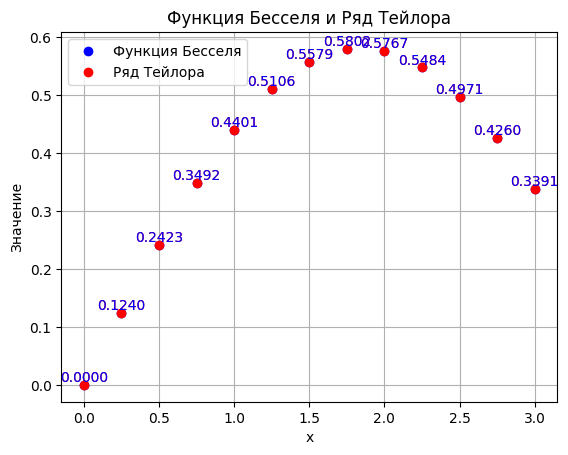

In [ ]:
#задание 1
from sympy import factorial, besselj
import numpy as np
import matplotlib.pyplot as plt


def taylor(x_values):
    epsilon = 0.0000001
    results = []

    for x in x_values:
        term = 0
        result = 0
        i = 0

        while True:
            term = ((-1) ** i * (x ** 2 / 4.0) ** i) / (factorial(i) * factorial(i + 1))
            result = result + term
            i += 1

            if abs((x / 2.0) * result - besselj(1, x)) <= epsilon:
                break

        results.append(((x / 2.0) * result, i))

    return results


def print_table(x_values, results):
    print("{:<14s}|{:<30s}|{:<30s}|{:<15s}".format("x", "Result", "Bessel", "Num Terms"))
    print("-" * 95)

    for i in range(len(results)):
        x = x_values[i]
        result = results[i][0]
        bessel = besselj(1, x)
        num_terms = results[i][1]
        print("{:<14.8f}|{:<30.20f}|{:<30.20f}|{:<15d}".format(float(x), float(result), float(bessel), num_terms))


if __name__ == '__main__':
    start = 0
    end = 3
    step = 0.25
    x_values = np.arange(start, end + step, step)

    results = taylor(x_values)

    print_table(x_values, results)

    x_taylor = np.arange(start, end + step, step)
    taylor_values = [val[0] for val in results]
    bessel = [float(besselj(1, val)) for val in x_taylor]

    plt.plot(x_values, bessel, 'bo', label='Функция Бесселя')
    plt.plot(x_taylor, taylor_values, 'ro', label='Ряд Тейлора')

    plt.xlabel('x')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid(True)
    plt.title('Функция Бесселя и Ряд Тейлора')
    for i in range(len(x_taylor)):
        plt.text(x_taylor[i], taylor_values[i], f'{taylor_values[i]:.4f}', ha='center', va='bottom', color='r')
        plt.text(x_values[i], bessel[i], f'{bessel[i]:.4f}', ha='center', va='bottom', color='b')
    plt.show()
